# Machine Learning, Exercise set #5

## 4. Cross-validation for ridge-regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read in the data
data = np.genfromtxt('data/boston.txt', skip_header=22, autostrip=True)

Use the first 100 rows for testing and the remaining rows for training with cross-validation.

In [15]:
test, cv = np.split(data, [100])
np.random.shuffle(cv)
X_test, y_test = np.split(test, [-1], axis=1)
X_cv, y_cv = np.split(cv, [-1], axis=1)

Let's take a look at the data we use for cross-validation

<Figure size 1440x360 with 0 Axes>

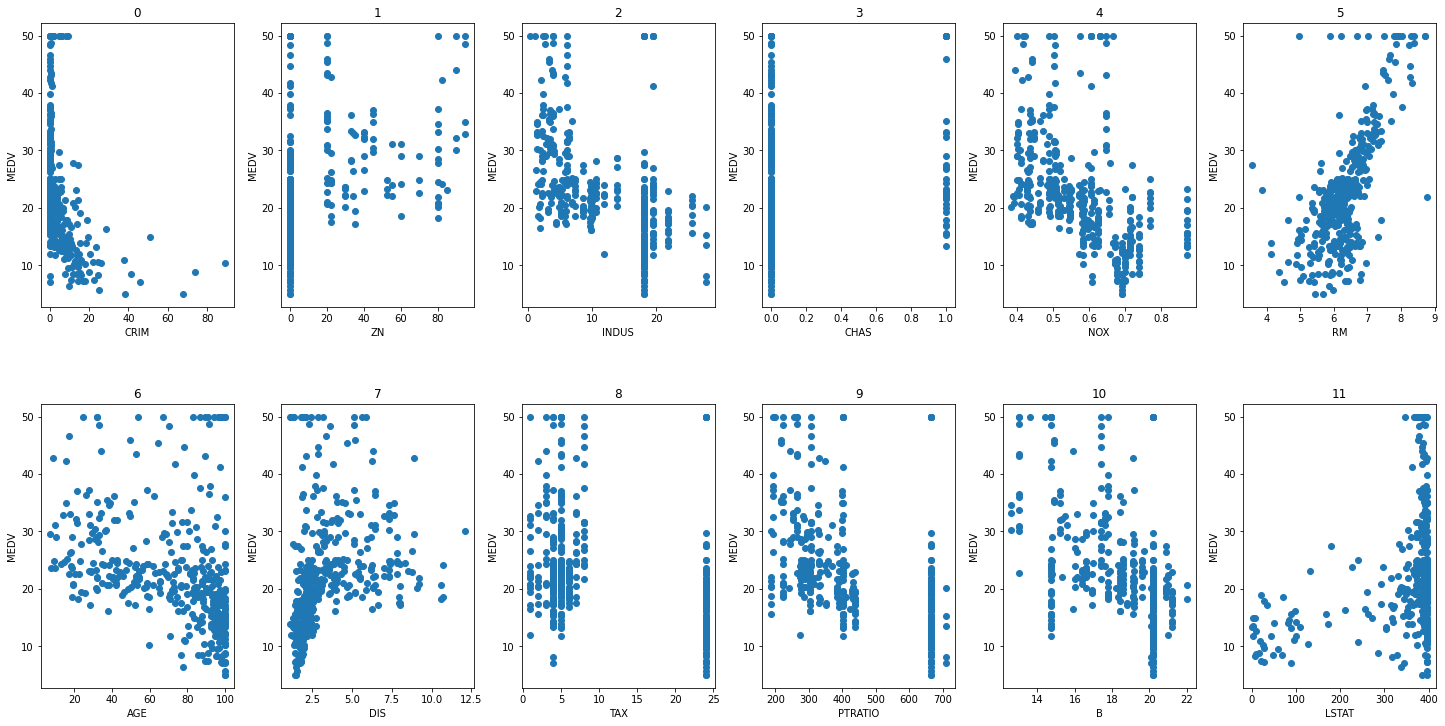

In [16]:
plt.figure(figsize=(20, 5))

target = y_cv
features = ['CRIM','ZN','INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS','TAX','PTRATIO','B','LSTAT']

fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
axs = axs.flatten()
for i, feature in enumerate(features):
    plt.subplot(2, 6, i+1)
    x = X_cv[:,i]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(i)
    plt.xlabel(feature)
    plt.ylabel('MEDV')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### Using the ridge regression estimate
<br>
$$\begin{aligned}
w_\text{ridge} & = \text{arg}\min_w \sum_{i=1}^n(y_i-x_i^Tw)^2+\lambda \lVert w \rVert_2^2 \\
& = (\lambda I + X^TX)^{-1}X^Ty
\end{aligned}$$

In [17]:
def ridge_regression(X, y, lamda):
    A = X.T @ X + lamda * np.eye(X.shape[1])
    b = X.T @ y
    return np.linalg.solve(A, b)

def MSE(y, y_pred):
    return np.mean((y - y_pred)**2)

In [32]:
def ridgeCV(X, y, number_of_folds=5, lambda_grid=[0.001, 0.1, 1,5,7,8, 10, 15, 20,  100]):
    best_score = np.inf
    # split up train data into number_of_folds folds
    # use np.array_split in case the folds can not be equally divided
    X_folds = np.array_split(X, number_of_folds)
    y_folds = np.array_split(y, number_of_folds)

    #for lmd in lambda_grid:
    for lmd in lambda_grid:
        val_err = 0
        for i in range(number_of_folds):
            X_val, X_train = X_folds[i], np.concatenate(X_folds[:i]+X_folds[i+1:])
            y_val, y_train = y_folds[i], np.concatenate(y_folds[:i]+y_folds[i+1:])    
            w_ridge = ridge_regression(X_train, y_train, lmd)
            y_pred = X_val @ w_ridge
            val_err = val_err + MSE(y_val, y_pred)
        mean_err = val_err / number_of_folds
        if mean_err < best_score:
            best_score = mean_err
            best_lmd = lmd
    best_w = ridge_regression(X, y, best_lmd)
        
    print('Best hyperparameter: λ = {}\n'.format(best_lmd))
    print('Best score: {}\n'.format(best_score))

    return best_w, best_lmd, best_score

In [33]:
w, best_lamda, best_score = ridgeCV(X_cv, y_cv)

Best hyperparameter: λ = 10

Best score: 30.76104862591855



Use the best lambda on the test set.

In [31]:
y_pred = X_test @ w
test_error = MSE(y_test,y_pred)
print('Test error for the best λ: {}\n'.format(test_error))

Test error for the best λ: 9.111688112907828

